In [5]:
import pandas as pd
file_path = 'soc-sign-bitcoinalpha.csv.gz'
data = pd.read_csv(file_path, compression='gzip', header=None)
data.columns = ['Source', 'Target', 'Weight', 'Timestamp']
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24186 entries, 0 to 24185
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Source     24186 non-null  int64
 1   Target     24186 non-null  int64
 2   Weight     24186 non-null  int64
 3   Timestamp  24186 non-null  int64
dtypes: int64(4)
memory usage: 755.9 KB
None
   Source  Target  Weight   Timestamp
0    7188       1      10  1407470400
1     430       1      10  1376539200
2    3134       1      10  1369713600
3    3026       1      10  1350014400
4    3010       1      10  1347854400


In [7]:
data.columns = ['Source', 'Target', 'Weight', 'Timestamp']
print(data.describe())
print("Unique Sources:", data['Source'].nunique())
print("Unique Targets:", data['Target'].nunique())


             Source        Target        Weight     Timestamp
count  24186.000000  24186.000000  24186.000000  2.418600e+04
mean     864.029314   1051.093815      1.463946  1.347099e+09
std     1592.085638   1871.765504      2.903656  3.397039e+07
min        1.000000      1.000000    -10.000000  1.289192e+09
25%       58.000000     66.000000      1.000000  1.312690e+09
50%      238.000000    279.000000      1.000000  1.345435e+09
75%      898.000000   1068.000000      2.000000  1.369454e+09
max     7604.000000   7604.000000     10.000000  1.453439e+09
Unique Sources: 3286
Unique Targets: 3754


In [19]:
import networkx as nx
G = nx.DiGraph()
edges = data[['Source', 'Target', 'Weight']].values
G.add_weighted_edges_from(edges)
weakly_connected_components = list(nx.weakly_connected_components(G))
num_components = len(weakly_connected_components)
print("Number of weakly connected components:", num_components)

Number of weakly connected components: 5


In [25]:
largest_subgraph = G.subgraph(largest_component).copy()
pagerank_scores_largest = nx.pagerank(largest_subgraph, weight='Weight')
pagerank_df_largest = pd.DataFrame(
    list(pagerank_scores_largest.items()), 
    columns=['Node', 'PageRank']
).sort_values(by='PageRank', ascending=False)
print('10 nút có pagerank cao nhất')
print(pagerank_df_largest.head(10))
print('10 nút có pagerank thấp nhất')
print(pagerank_df_largest.tail(10))

10 nút có pagerank cao nhất
     Node  PageRank
1       1  0.017020
690     3  0.008974
149     4  0.008036
49      2  0.006634
540   177  0.006618
564     7  0.006553
43     11  0.006202
53     10  0.005608
682    13  0.005296
711     6  0.004788
10 nút có pagerank thấp nhất
      Node  PageRank
3449  5660   0.00005
2035  6317   0.00005
2034  6667   0.00005
2031  6736   0.00005
2684  6644   0.00005
2015  6257   0.00005
2686  6958   0.00005
2216  5415   0.00005
3494  3480   0.00005
0     7188   0.00005


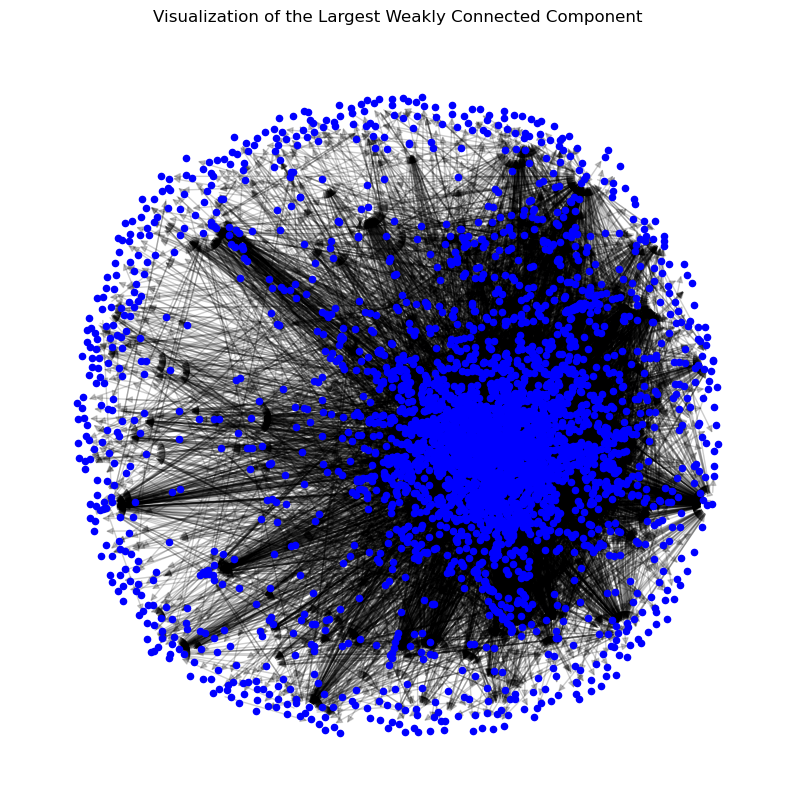

In [21]:
import matplotlib.pyplot as plt
largest_subgraph = G.subgraph(largest_component)
pos = nx.spring_layout(largest_subgraph)
plt.figure(figsize=(10, 10))
nx.draw_networkx_nodes(largest_subgraph, pos, node_size=20, node_color='blue')
nx.draw_networkx_edges(largest_subgraph, pos, alpha=0.2)
plt.title("Visualization of the Largest Weakly Connected Component")
plt.axis('off')
plt.show()

In [17]:
weakly_connected_components = list(nx.weakly_connected_components(G))
component_sizes = [len(component) for component in weakly_connected_components]
for i, size in enumerate(component_sizes):
    print(f"Thành phần {i+1}: {size} nút")

Thành phần 1: 3775 nút
Thành phần 2: 2 nút
Thành phần 3: 2 nút
Thành phần 4: 2 nút
Thành phần 5: 2 nút
